<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/Office_Hour_Capstone_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Experimentation Capstone

## Introduction

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

## Problem

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

 

Data

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

 

Data Science Approach

·         Data wrangling/ data cleaning

·         EDA - exploring the data

·         Modeling - A/B testing

·         Interpretation

Deliverables

·         All Python code

·         A presentation slide deck

## Data Preprocessing

In [121]:
#packages import
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [122]:
#data import
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/

df = pd.read_csv("AdSmartABdata.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [123]:
df.shape

(8077, 9)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [125]:
# Checking for nulls
total_nulls=df.isnull().sum()
total_nulls

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [126]:
df.replace({'intl_plan': {'yes': 0, 'no': 0}, 'voice_mail_plan': {'yes': 0, 'no': 0}}, inplace=True)


In [127]:
# non-answer observations (both 'yes' and 'no' columns are equal to 0)
df_00=df[(df['yes']==0)&(df['no']==0)]
df_00.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0


In [128]:
# dropped non-answer observations
df_A00=df.drop(df_00.index)
print('# Observations: {}'.format(df_A00.shape[0]))
df_A00.head()

# Observations: 1243


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [129]:
# Checking for nulls again
df_A00.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

## Exploratory Data Analysis

In [130]:
#exploring 'experiment' values
df_A00['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [131]:
number_control=df_A00['experiment'].value_counts().control
number_exposed=df_A00['experiment'].value_counts().exposed
number_control, number_control

(586, 586)

In [132]:
experiments=df_A00.groupby('experiment')['yes','no'].sum()
experiments

<ipython-input-132-3d10058c5d56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  experiments=df_A00.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [133]:
experiments_yes= df_A00.groupby('experiment')['yes'].sum()
experiments_yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [134]:
control_yes=experiments_yes.iloc[0]
exposed_yes=experiments_yes.iloc[1]
control_yes, exposed_yes

(264, 308)

## Statistical Analysis

#### Experiment Approach

- Null Hyphothesis 𝐻0: There is no significant difference between the ad success rate of both groups


- Alternative Hyphothesis 𝐻1: There is significant difference between the ad success rate of both groups


- We will perform a two-tailed test


- Confidence Level: 95% (α=0.05)

In [135]:
# The conversion rate
rate_control= control_yes/number_control
rate_exposed= exposed_yes/number_exposed
print(rate_control, rate_exposed)
print('The conversion rate :', rate_exposed-rate_control)

0.45051194539249145 0.4687975646879756
The conversion rate : 0.018285619295484168


In [136]:
# Significance Level
alpha = 0.05

In [137]:
p_pooled_hat=(control_yes+exposed_yes)/(number_control+number_exposed)
p_pooled_hat

0.46017699115044247

In [138]:
pooled_variance=p_pooled_hat*(1-p_pooled_hat)*(1/number_control+1/number_exposed)
pooled_variance

0.0008020185896747209

In [139]:
# Standard Error
SE=np.sqrt(pooled_variance)
SE

0.028319932727228023

In [140]:
# test statsitics
Test_stat=(rate_control - rate_exposed)/SE
Test_stat

-0.645680181221037

In [141]:
# critical value usig the standard normal distribution
Z_crit=norm.ppf(1-alpha/2)
Z_crit

1.959963984540054

In [142]:
# Margin of error
m=SE*Z_crit
m

0.055506048189964116

In [143]:
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value=norm.sf(Test_stat)*2
p_value

1.4815135017801033

In [144]:
# Confidence Interval
CI=[(rate_control-rate_exposed)-SE*Z_crit, (rate_control-rate_exposed)+SE*Z_crit]
CI

[-0.07379166748544828, 0.03722042889447995]

In [145]:
print('Test Statistics stat:', np.round(Test_stat,4))
print('Z-critical:',  np.round(Z_crit,4))
print('P_value:',  np.round(p_value,4))
print('Confidence Interval of 2 sample Z-test for proportions: ', np.round(CI,4))

Test Statistics stat: -0.6457
Z-critical: 1.96
P_value: 1.4815
Confidence Interval of 2 sample Z-test for proportions:  [-0.0738  0.0372]


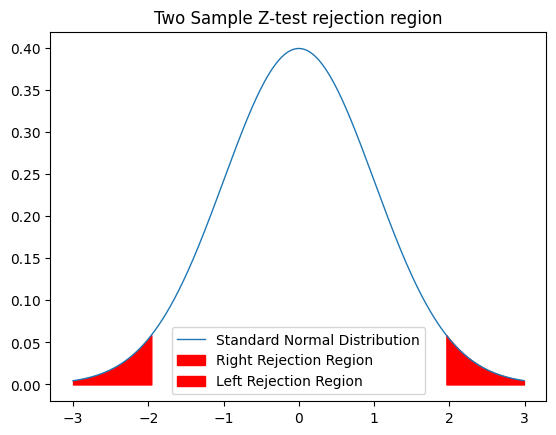

In [146]:
z=np.arange(-3, 3, 0.01)
plt.plot(z, norm.pdf(z), label='Standard Normal Distribution', linewidth=1)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label='Right Rejection Region',color ='red' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label='Left Rejection Region',color='red' )
plt.title('Two Sample Z-test rejection region')
plt.legend()
plt.show()

In [147]:
if np.abs(Test_stat)>=Z_crit:
    print(f'Test statistics:{round(np.abs(Test_stat),4)} >= Z-critical:{round(Z_crit,4)}, rejected the null hypothesis')
else:
    print(f'Test statistics:{round(np.abs(Test_stat),4)} < Z-critical:{round(Z_crit,4)}, can not be rejected the null hypothesis')

Test statistics:0.6457 < Z-critical:1.96, can not be rejected the null hypothesis


## Conclusion

- Null hypothesis 𝐻0 can not be rejected, which means that the new advertisement design did not performed better than the old one.

- There were enough data points to make a reasonable judgement.

- Based on the A/B Testing Analysis the new advertisement design does not give an increase in brand awareness.

## References

- https://www.visual-design.net/post/an-interactive-guide-to-hypothesis-testing-in-python

- https://www.yourdatateacher.com/2022/10/17/a-beginners-guide-to-statistical-hypothesis-tests/

- https://pythonguides.com/python-scipy-stats-norm/

- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

- https://towardsdatascience.com/analyzing-a-b-test-results-with-python-code-b55fdcd8a78e

#**OFFICE HOUR**

## Introduction

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

## Problem

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

 

Data

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

 

Data Science Approach

·         Data wrangling/ data cleaning

·         EDA - exploring the data

·         Modeling - A/B testing

·         Interpretation

Deliverables

·         All Python code

·         A presentation slide deck

## **Data Preprocessing**

####**1. Import the necessary libraries**

In [148]:
#packages import
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
pd.set_option('Display.max_rows', None, 'Display.max_columns', None)
import os
import seaborn as sns

#### **2. Load the data into a pandas dataframe**

In [149]:
#data import
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/

df = pd.read_csv("AdSmartABdata.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


####**3. Check the data for any missing values, incorrect datatypes, duplicates or outliers**

For this purpose the following functions can be used:
- head()
- info()
- describe()

Outliers can be handled by either removing them or transform them using appropriate techniques.

Convert categorical variables:

If there are any categorical variables in the data, you may need to convert them to numerical values using techniques like one-hot-encoding or label encoding.

In [150]:
display(df.head())

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [151]:
display(df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Columns: 9 entries, auction_id to no
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


None

In [152]:
#display(df.describe(include='0'))
display(df.describe(include='object')) #for categorical columns
display(df.describe()) #for numeric columns

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,269,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


**Check for missing values**

Handle missing values with either dropping the rows with missing values or fill in the missing values with appropriate values.

In [153]:
df.isnull().any().sum()

0

No missing values

**Check for incorrect data types**

In [154]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

**Check for duplicates**

Check any duplicate rows in the data using duplicate() function and remove them if necessary.

In [155]:
df.duplicated().any().sum()

0

No duplicated values

**Drop unnecessary columns**

In [156]:
df['auction_id'].nunique()

8077

In [157]:
df.drop(columns = 'auction_id', inplace=True)

**Choose an appropriate index if necessary**

In [158]:
df.set_index('date', drop=True, inplace=True)

In [159]:
display(df.head())

,experiment,hour,device_make,platform_os,browser,yes,no
date,,,,,,,
2020-07-10,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-07,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0
2020-07-05,exposed,2,E5823,6,Chrome Mobile WebView,0,1
2020-07-03,control,15,Samsung SM-A705FN,6,Facebook,0,0
2020-07-03,control,15,Generic Smartphone,6,Chrome Mobile,0,0


In [160]:
df['response'] = np.where(df['yes']==1, 'yes', 'no')
display(df.head())

,experiment,hour,device_make,platform_os,browser,yes,no,response
date,,,,,,,,
2020-07-10,exposed,8,Generic Smartphone,6,Chrome Mobile,0,0,no
2020-07-07,exposed,10,Generic Smartphone,6,Chrome Mobile,0,0,no
2020-07-05,exposed,2,E5823,6,Chrome Mobile WebView,0,1,no
2020-07-03,control,15,Samsung SM-A705FN,6,Facebook,0,0,no
2020-07-03,control,15,Generic Smartphone,6,Chrome Mobile,0,0,no


#### **4. A/B test modeling**

**Check the treatment groups:**

Check the number of observations in each treatment group and make sure they are balanced. You can use functions like value_count() to count the number of observations in each group.

**Check the control groups:**

Check the distribution of the control group to make sure it is representative of the overall polulation.

_____________________________________________

Analyzing A/B test results with Python, when it comes to interpreting the results of your A/B test, there is a set of values you should calculate to test the statistical hypothesis stated earlier (to test whether there is a statistically significant difference between control and experimental groups). This st includes:

- Choosing an appropriate statistical test
- Calculating the test statistics (T)
- Calculating the p-value of the test statistics
- Reject or fail to reject the statistical hypothesis (statastical significance)
- Calculate the margin of error (external validity of the experiment)
- Calculate the confidence interval (external validity and practical significance of the experiment)


**Check the number of samples in control and treatment group**

In [161]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

since the number of samples are large enough (>30), we can use central limit theorem to estimate the expected value of each population from which the samples are drawn.
- Central limit theorem states that the sample distribution of all possible sample statistics (prportion) is approximately normal and the expected value of the original population can be estimated by the expected value of givin sample.

**Create contigency table:**

A contigency table, sometimes called a two-way frequency table, is tabular mechanism with at least two rows and two columns used in statistics to present categorical data in terems of frequency counts

In [162]:
#create contigency table from scratch
d1= pd.DataFrame()
d1['Exposed'] = [len(df[(df['experiment']=='exposed') & (df['yes']==1)]),
                len(df[(df['experiment']=='exposed') & (df['no']==1)])]

d1['control'] = [len(df[(df['experiment']=='control') & (df['yes']==1)]),
                len(df[(df['experiment']=='control') & (df['no']==1)])]

d1.index = ['yes', 'no']
display(d1)             

,Exposed,control
yes,308,264
no,349,322


In [163]:
pd.pivot_table(columns='experiment', values=['yes','no'], aggfunc={'yes':np.sum, 'no':np.sum}, margins=True, data=df)

experiment,control,All,exposed,All
no,322,322,349,349
yes,264,264,308,308


In [164]:
d= pd.pivot_table(columns='experiment', values=['yes'], aggfunc=np.sum, data=df)
d

experiment,control,exposed
yes,264,308


In [165]:
d =  pd.pivot_table(columns = 'experiment', values= ['yes', 'no'], aggfunc=np.sum, data=df)
d

experiment,control,exposed
no,322,349
yes,264,308


In [166]:
df.groupby('experiment')['response'].value_counts()

experiment  response
control     no          3807
            yes          264
exposed     no          3698
            yes          308
Name: response, dtype: int64

In [167]:
#for small size
#p1 = p_exp_hat
#p2 = p_con_hat
#SE = np.sqrt(p1*(1-p1)/N_exp) + (p2*(1-p2)/N_con)

#CI1 = (p1 - p2) - 2*SE
#CI1 = round(CI1,3)

#CI2 = np.log2(p1/p2) + 2*SE
#CI2 = round(CI2,3)

#print(f'{CI1:}, {(p1-p2):.3f}, {CI2:.3f}')
#print(SE)
#print((p1-p2)/SE)


Since the CI does not contain null value, then we can reject the null hypothesis.

**Create contingency table**

In [168]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [169]:
df.groupby('experiment')['response']. value_counts()

experiment  response
control     no          3807
            yes          264
exposed     no          3698
            yes          308
Name: response, dtype: int64

In [170]:
X_con = 264 #no of responses in control group
N_con = 4071 #no of total observations in control group
X_exp = 308  #no of responses in treatment group
N_exp = 4006 #no of total observations in treatment group

In [171]:
#ratio of responses in control group
p_con_hat = X_con/N_con
#or
#p_con_hat = d['control'][1]/N_con

In [172]:
#ratio of responses in control group
p_exp_hat = X_exp/N_exp
#or
#p_exp_hat = d['control'][1]/N_exp


**estimation of proportion difference**

In [173]:
#proportion difference
proportion_difference= abs(p_con_hat - p_exp_hat)
proportion_difference= round(proportion_difference, 3)
proportion_difference

0.012

The above value in the absolutedifference lets include the variance and uncertainity to it by finding the confidence interval i.e. 95% CI:

proportion_difference +- 2 x SE(proportion_difference)

In [174]:
p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled_hat * (1-p_pooled_hat)* (1/N_con + 1/N_exp)



In [175]:
#Standard Error
SE = np.sqrt(pooled_variance)
print(f'Standard error = {SE:.4f}')

Standard error = 0.0057


In [176]:
#Significance Level
alpha = 0.05

In [177]:
#critical value using the standard normal distribution
#takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.
Z_crit = norm.ppf(1-alpha/2)
Z_crit

1.959963984540054

In [178]:
#Margin of error
#m = SE * Z_crit
#m

0.011188977192742115

In [179]:
#Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE*Z_crit, (p_con_hat - p_exp_hat) + SE * Z_crit]
print(CI)

[-0.02322471871678619, -0.0008467643313019597]


In [180]:
norm.sf(Test_stat)*2

1.4815135017801033

In [183]:
#test statistics
Test_stat = (p_con_hat - p_exp_hat)/SE
Test_stat

-2.108290999972843

In [184]:
#two sided test and using symmetry property of Normal Distribution so we multiple with 2
p_value = norm.sf(Test_stat)*2 
p_value

1.9649941740316754

In [186]:
if np.abs(Test_stat) >= Z_crit:
  print('reject the null hypothesis')
  print('Z_critical:', Z_crit)
  print('P_value:', p_value)
  print('Confidence Interval of 2 sample Z-test for proprtions:', np.round(CI,5))

reject the null hypothesis
Z_critical: 1.959963984540054
P_value: 1.9649941740316754
Confidence Interval of 2 sample Z-test for proprtions: [-0.02322 -0.00085]


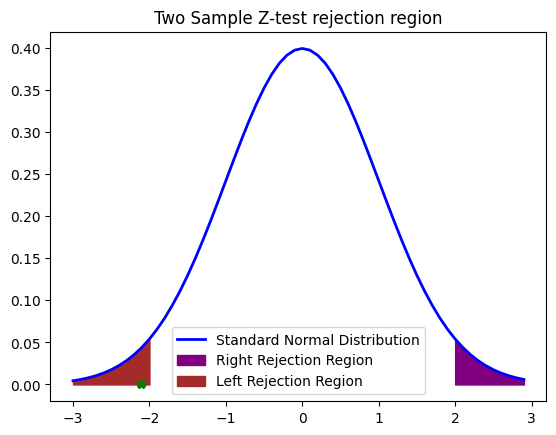

In [195]:
import matplotlib.pyplot as plt

z= np.arange(-3,3, 0.1)

plt.plot(z, norm.pdf(z), label='Standard Normal Distribution', color ='blue', linewidth=2)
plt.plot(Test_stat, 0, 'X', color='green', linewidth=5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label='Right Rejection Region', color='purple')
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label='Left Rejection Region', color='brown')
plt.title('Two Sample Z-test rejection region')
plt.legend()
plt.show()